# <b>Fondamenti di Analisi Dati</b> - a.a. 2019/2020

## 5 <b>Distribuzioni dei Dati - Visualizzazioni</b>

In questo modulo esploreremo alcuni strumenti utili per visualizzare distribuzioni di dati univariati.

### 5.1 Analisi di un dataset

Utilizzeremo un dataset di contenente osservazioni relativi a pesi e altezze di diversi soggetti. Il dataset è disponibile su Kaggle all'indirizzo <a href="https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex/" target="_blank">https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex/</a>

In [1]:
import pandas as pd
data=pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.7+ KB


Il dataset contiene 500 osservazioni e 4 colonne: genere, altezza, peso e BMI (classificato).

In [2]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Dato che ci occuperemo, in una prima fase, di dati univariati, ogni colonna del dataframe costituirà per noi un campione a sé stante.

### 5.2 Probability Mass Function

#### 5.2.1 Diagramma a barre delle frequenze assolute

Un primo modo di descrivere il campione consiste nel calcolare la frequenza di goni elemento tramite il metodo <code>value_counts</code>.

In [3]:
height_counts = data['Height'].value_counts()
height_counts

188    15
179    14
187    14
168    13
178    13
182    12
172    12
184    12
183    11
150    11
181    11
185    11
157    10
154    10
153    10
165    10
169    10
195    10
186     9
167     9
164     9
162     9
142     9
161     9
159     9
145     9
177     9
146     9
190     9
166     9
152     8
163     8
151     8
141     8
140     8
171     8
174     8
180     8
197     7
160     7
147     7
176     7
191     7
156     6
192     6
196     6
155     6
170     6
194     5
198     5
144     5
193     5
189     5
148     5
149     5
158     5
175     4
173     4
143     3
199     3
Name: Height, dtype: int64

In metodo restituisce una <code>Series</code> di Pandas che ha come <i>indici</i> i valori unici delle altezze e come valori le frequenze dei valori unici.
Gli elementi della serie sono ordinati per frequenza. Sappiamo dunque che il primo elemento della serie è il più frequente mentre l'ultimo è il meno frequente.

In [4]:
print("Altezza più frequente:",height_counts.iloc[0])
print("Altezza meno frequente:",height_counts.iloc[-1])

Altezza più frequente: 15
Altezza meno frequente: 3


È utile riordinare la serie ottenuta per indice in modo da ottenere una serie di valori crescente con le relative frequenze.

In [5]:
data['Height'].value_counts().sort_index()

140     8
141     8
142     9
143     3
144     5
145     9
146     9
147     7
148     5
149     5
150    11
151     8
152     8
153    10
154    10
155     6
156     6
157    10
158     5
159     9
160     7
161     9
162     9
163     8
164     9
165    10
166     9
167     9
168    13
169    10
170     6
171     8
172    12
173     4
174     8
175     4
176     7
177     9
178    13
179    14
180     8
181    11
182    12
183    11
184    12
185    11
186     9
187    14
188    15
189     5
190     9
191     7
192     6
193     5
194     5
195    10
196     6
197     7
198     5
199     3
Name: Height, dtype: int64

Le frequenze dei dati possono essere rappresentate graficamente mediante un grafico a barre utilizzando le funzionalità di plot di
<code>Pandas</code>. Tali funzionalità si appoggiano a matplotlib, per cui, per avere maggiore controllo su di esse dobbiamo importare <code>pyplot</code>.

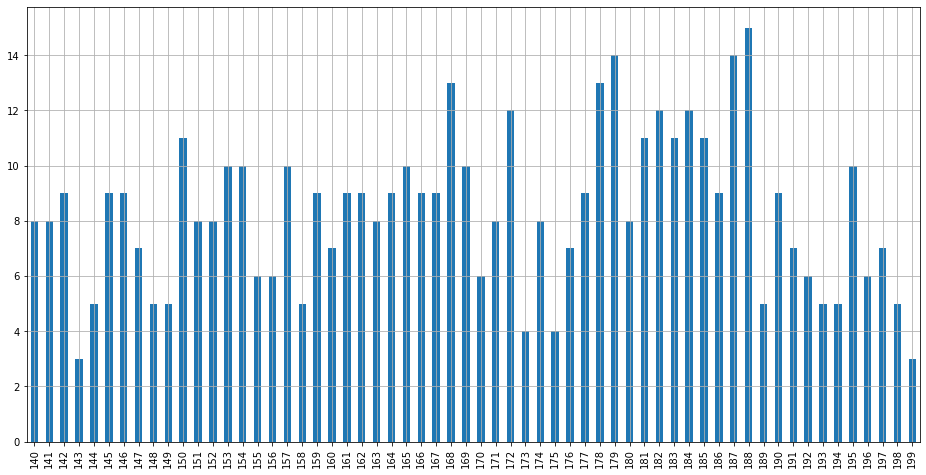

In [48]:
from matplotlib import pyplot as plt
data['Height'].value_counts().sort_index().plot.bar(figsize=(16,8))
plt.grid()
plt.show()

Il parametro <code>figsize=()</code> serve a specificare le dimensioni del plot mentre <code>plt.grid()</code> serve a mostrare la griglia.

Il grafico ottenuto è detto <b>diagramma a barre delle frequenze assolute</b> e mostra il numero di volte in cui ciascun valore appare nel
campione.

In alternativa è possibile plottare un grafico a barre direttamente tramite matplotlib nel seguente modo:

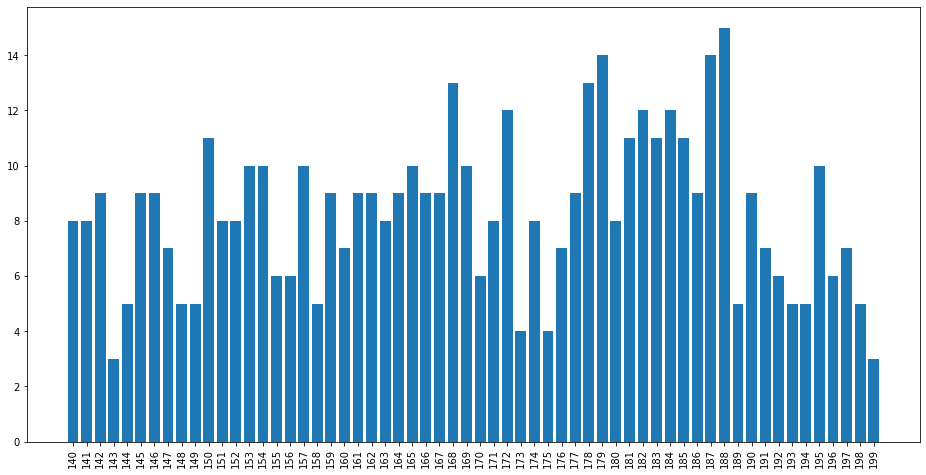

In [66]:
plt.figure(figsize=(16,8))
height_counts = data['Height'].value_counts().sort_index()
plt.bar(height_counts.index, height_counts.values)
plt.xticks(height_counts.index, rotation='vertical')
#plt.grid()
plt.show()

In molti casi sarà possibile utilizzare le funzioni compatte messe a disposizione da Pandas, mentre in altri sarà necessario utilizzare
matplotlib esplicitamente.

#### 5.2.2 PMF

L'istrogamma assoluto delle frequenze ci permette di farci un'idea generica sulla distribuzione dei dati, ma non ci
permette di ragionare in termini probabilistici e di rispondere a domande del tipo: "se scelgo un elemento a caso dal compione, qual è la
probabilità di ottenere un individuo alto 168 cm?".
<br>Per ragionare in termini probabilistici dobbiamo costruire una Probability
Mass Function $f$ che rispetti le seguenti regole:
$$0 \leqslant f(x_i) \leqslant 1 \:\:\:\: \forall i = 1,...,N$$
$$\sum_{i}^{N} f(x_i) = 1$$
Le due regole sono soddisfatte dividendo le frequenze per il numero di osservazioni presenti nel campione.

In [53]:
data['Height'].value_counts().sort_index()/len(data['Height'])

140    0.016
141    0.016
142    0.018
143    0.006
144    0.010
145    0.018
146    0.018
147    0.014
148    0.010
149    0.010
150    0.022
151    0.016
152    0.016
153    0.020
154    0.020
155    0.012
156    0.012
157    0.020
158    0.010
159    0.018
160    0.014
161    0.018
162    0.018
163    0.016
164    0.018
165    0.020
166    0.018
167    0.018
168    0.026
169    0.020
170    0.012
171    0.016
172    0.024
173    0.008
174    0.016
175    0.008
176    0.014
177    0.018
178    0.026
179    0.028
180    0.016
181    0.022
182    0.024
183    0.022
184    0.024
185    0.022
186    0.018
187    0.028
188    0.030
189    0.010
190    0.018
191    0.014
192    0.012
193    0.010
194    0.010
195    0.020
196    0.012
197    0.014
198    0.010
199    0.006
Name: Height, dtype: float64

In alternativa possiamo specificare il parametro <code>normalize=True</code> all'interno di <code>value_counts</code>.

In [54]:
data['Height'].value_counts(normalize=True).sort_index()

140    0.016
141    0.016
142    0.018
143    0.006
144    0.010
145    0.018
146    0.018
147    0.014
148    0.010
149    0.010
150    0.022
151    0.016
152    0.016
153    0.020
154    0.020
155    0.012
156    0.012
157    0.020
158    0.010
159    0.018
160    0.014
161    0.018
162    0.018
163    0.016
164    0.018
165    0.020
166    0.018
167    0.018
168    0.026
169    0.020
170    0.012
171    0.016
172    0.024
173    0.008
174    0.016
175    0.008
176    0.014
177    0.018
178    0.026
179    0.028
180    0.016
181    0.022
182    0.024
183    0.022
184    0.024
185    0.022
186    0.018
187    0.028
188    0.030
189    0.010
190    0.018
191    0.014
192    0.012
193    0.010
194    0.010
195    0.020
196    0.012
197    0.014
198    0.010
199    0.006
Name: Height, dtype: float64

Tutti i numeri sono compresi tra zero e uno e la somma dei valori è pari a 1.

In [56]:
print("{:0.2f}".format(data['Height'].value_counts(normalize=True).sort_index().sum()))

1.00


La rappresentazione grafica che si ottiene è detta <b>diagramma a barre delle frequenze</b> e rappresenta una <b>probability mass function
(PMF)</b> che associa ad ogni <i>valore discreto</i> presente nel campione una probabilità.

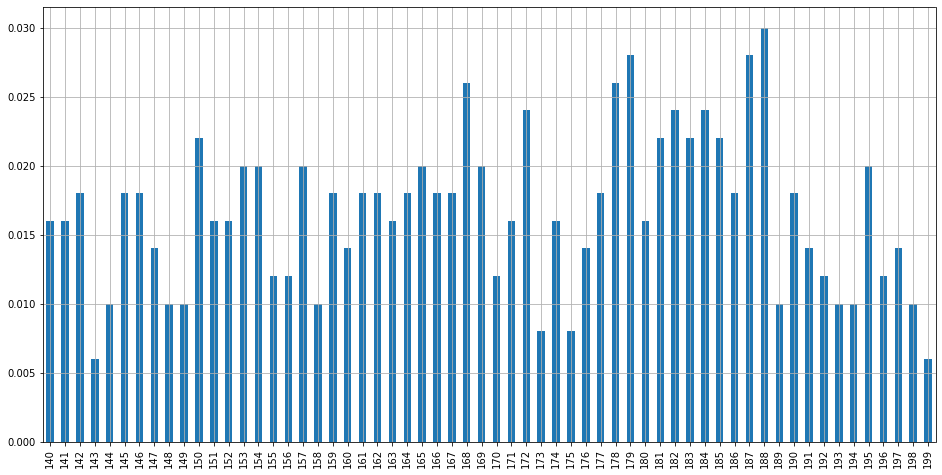

In [57]:
(data['Height'].value_counts(normalize=True).sort_index()).plot.bar(figsize=(16,8))
plt.grid()
plt.show()

Le PMF possono essere utili anche per confrontare diversi campioni di dati. Consideriamo ad esempio le altezze delle donne e degli
uomini come due campioni separati nel dataset e calcoliamone le PMF.

In [12]:
pmf_height_m = data[data['Gender']=='Male']['Height'].value_counts(normalize=True).sort_index()
pmf_height_f = data[data['Gender']=='Female']['Height'].value_counts(normalize=True).sort_index()

Mostriamo i due istogrammi mettendoli a confronto.

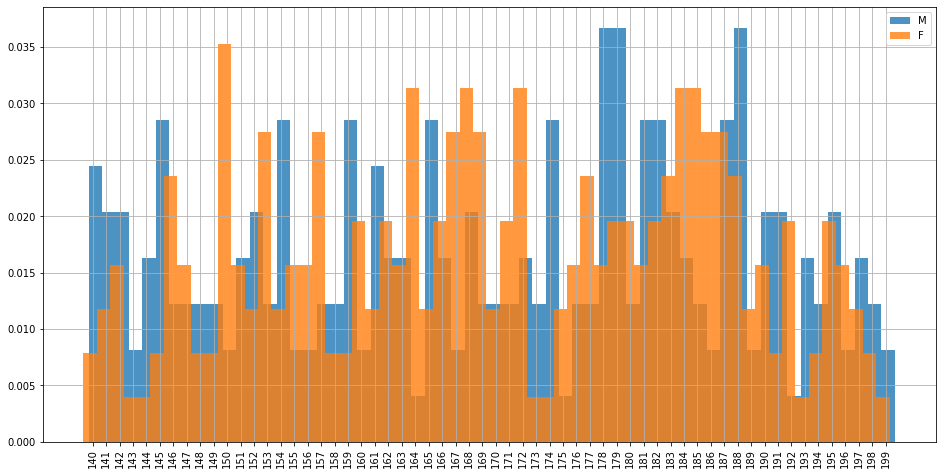

In [13]:
plt.figure(figsize=(16,8))
#sommiamo e sottraiamo 0.2 agli indici per traslare le barre e renderle visibili (altrimenti sarebbero sovrapposte)
#Inoltre impostiamo alpha=0.8 per rendere le barre parzialmente trasparenti
plt.bar(pmf_height_m.index+0.2, pmf_height_m.values, width=1, alpha=0.8)
plt.bar(pmf_height_f.index-0.2, pmf_height_f.values, width=1, alpha=0.8)
plt.xticks(data['Height'].unique(), rotation='vertical')
plt.legend(['M','F']) #mostriamo una legenda
plt.grid()
plt.show()

### 5.3 Cumulative Distribution Function

Le PMF funzionano particolarmente bene quando i valori unici sono pochi.<br>
Proviamo a plottare la PMF dei pesi.

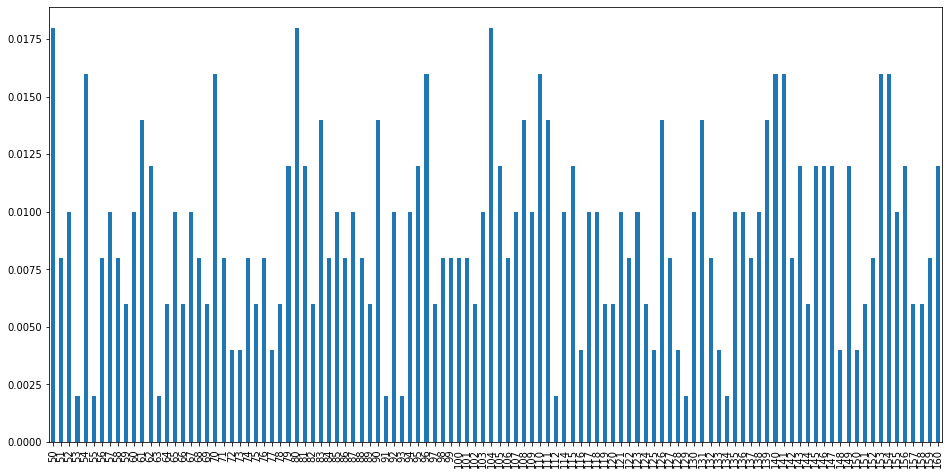

In [14]:
data['Weight'].value_counts(normalize=True).sort_index().plot.bar(figsize=(16,8))
plt.show()

Nel grafico sopra il numero di valori univoci è abbastanza alto quasi da non permetterne la lettura delle etichette sulle ascisse. Possiamo ottenere una situazione più leggibile tramite matplotlib.

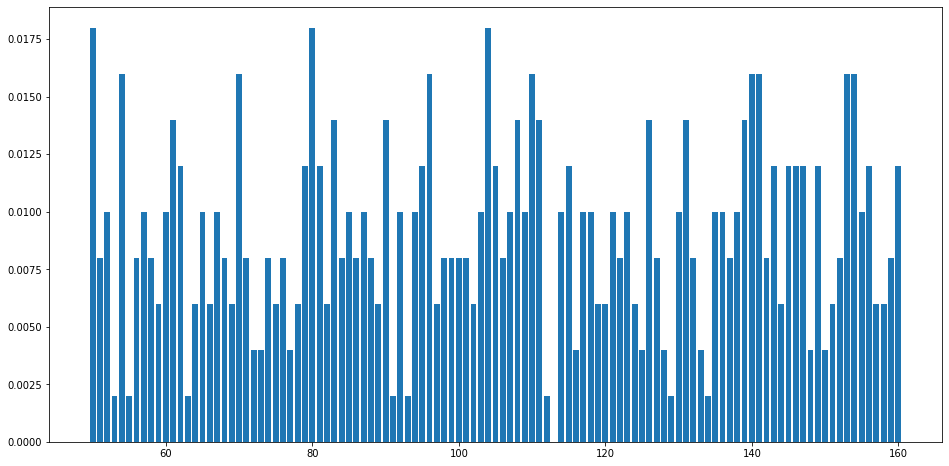

In [15]:
hist=data['Weight'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(16,8))
plt.bar(hist.index,hist.values)
plt.show()

Confrontiamo i pesi di donne e uomini.

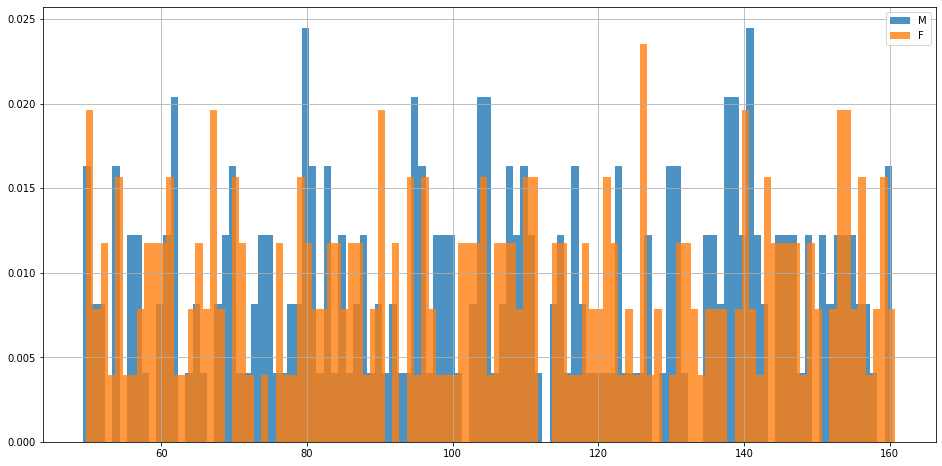

In [16]:
pmf_weight_m = data[data['Gender']=='Male']['Weight'].value_counts(normalize=True).sort_index()
pmf_weight_f = data[data['Gender']=='Female']['Weight'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(16,8))
plt.bar(pmf_weight_m.index-0.2, pmf_weight_m.values, width=1, alpha=0.8)
plt.bar(pmf_weight_f.index+0.2, pmf_weight_f.values, width=1, alpha=0.8)
plt.legend(['M','F'])
plt.grid()
plt.show()

Dal grafico sopra potremmo non essere in grado di capire bene se i due fenomeni obbediscono o meno alla stessa densità di probabilità.
<br>Un metodo per ovviare a questo problema consiste nell'utilizzare una <b>Cumulative Distribution Function (CDF)</b>. Una CDF mappa un valore del campione al relativo "ordine di quantile", ovvero alla frazione di valori del campione che sono minori o uguali a $x$. Ad esempio, se il valore $x$ è il quantile $0.25$ (il 25% dei valori sono minori o uguali a $x$), la CDF assegnerà a $x$ proprio il valore $0.25$. Possiamo calcolare le CDF dei due campioni di pesi a partire dalle rispettive PMF avvalendoci della funzione <code>cumsum</code>

La funzione <code>cumsum</code> di una serie di valori calcola ad ogni posizione $i$ la somma dei primi $i$ valori. 

In [17]:
a = pd.Series([1,3,6,8,9])
a.cumsum()

0     1
1     4
2    10
3    18
4    27
dtype: int64

Dal momento che le PMF sono ordinate, la funzione <code>cumsum</code> calcola per ogni indice la somma delle probabilità dei valori precedenti.<br>
Calcoliamo le <b>CDF</b> dei due campioni e confrontiamole.

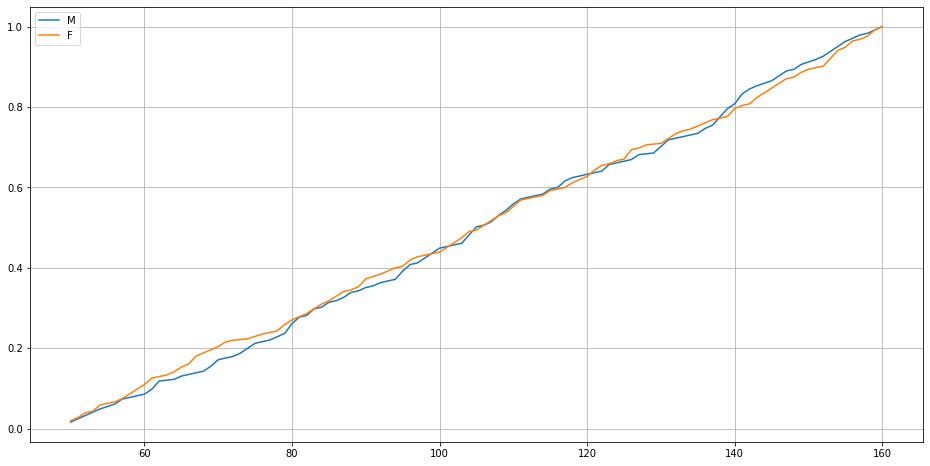

In [18]:
cdf_weight_m = data[data['Gender']=='Male']['Weight'].value_counts(normalize=True).sort_index().cumsum()
cdf_weight_f = data[data['Gender']=='Female']['Weight'].value_counts(normalize=True).sort_index().cumsum()
plt.figure(figsize=(16,8))
plt.plot(cdf_weight_m.index, cdf_weight_m.values)
plt.plot(cdf_weight_f.index, cdf_weight_f.values)
plt.legend(['M','F'])
plt.grid()
plt.show()

Le <b>CDF</b>, quindi, tornano utili per verificare graficamente se due fenomeni obbediscono alla stessa densità di probabilità o meno. Prendiamo ad esempio il noto dataset "Titanic".

In [19]:
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv', index_col='PassengerId')

In [20]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Confrontiamo adesso le distribuzioni delle età dei passeggeri di sesso maschile e femminile.

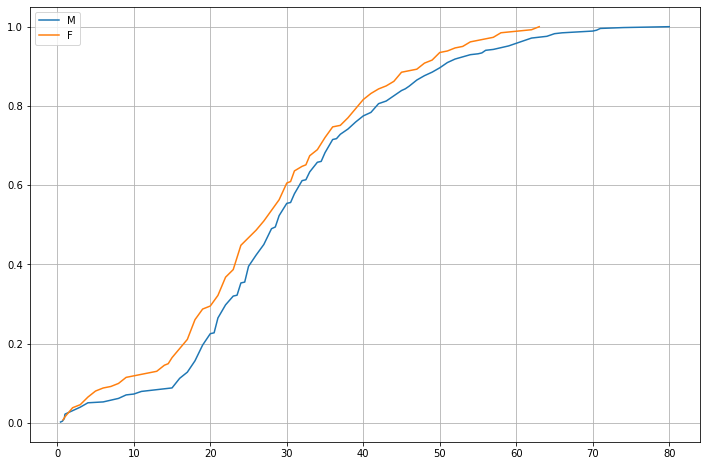

In [21]:
a=titanic[titanic['Sex']=='male']['Age'].value_counts(normalize=True).sort_index().cumsum()
b=titanic[titanic['Sex']=='female']['Age'].value_counts(normalize=True).sort_index().cumsum()
plt.figure(figsize=(12,8))
plt.plot(a.index,a.values)
plt.plot(b.index,b.values)
plt.grid()
plt.legend(['M','F'])
plt.show()

In questo caso le due curve hanno delle forme molto simili. Ciò suggerisce che i due fenomeni obbediscono a densità di probabilità simili. È possibile notare, inoltre, che le donne tendono ad essere più giovani degli uomini.

### 5.4 Approssimare una PDF - Istogrammi

Idealmente, sarebbe utile conoscere la Probability Density Function (PDF) della popolazione dalla quale è stato estratto il campione. Una
PDF è l'analogo di una PMF nel caso in cui la variabile di riferimento sia considerata continua. In pratica, passare da una PMF a una PDF
permette di descrivere meglio il fenomeno e ridurre l'influenza del rumore dovuto alle rilevazioni. Un modo per approssimare una PDF
direttamente dai dati, consiste nel dividere il range dei dati in un certo numero di "bin" e costruire un "istogramma". Questa
rappresentazione ha lo scopo di "approssimare" la PDF (continua) della popolazione di riferimento. Possiamo plottare un istogramma con
matplotlib come segue:

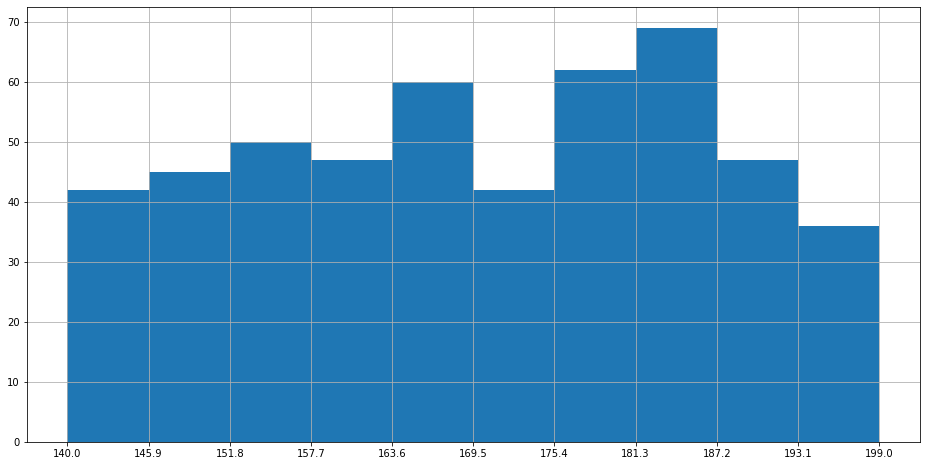

In [84]:
plt.figure(figsize=(16,8))
_,edges,_= plt.hist(data['Height'])
plt.xticks(edges)
plt.grid()
plt.show()

Oltre a graficare l'istogramma, la funzione <b>plt.hist</b> restituisce tre valori:
<ul>
<li>un vettore contenente i valori dell'istogramma;
<li>i "bordi" di ogni bin;
<li>una lista di handle agli elementi grafici visualizzati.
    Nell'esempio sopra abbiamo utilizzato la notazione <code>_,edges,_</code> per ottenere i "bordi"
dell'istogramma.
Il numero di bin può essere specificato mediante il parametro <code>bin</code>. Calcoliamo il numero di bin mediante i criteri di di Struges ($bins = 3.3 \: log(n)$) e Rice ($bins = 2 \: n^{1/3}$ ) e plottiamo nuovamente l'istogramma:

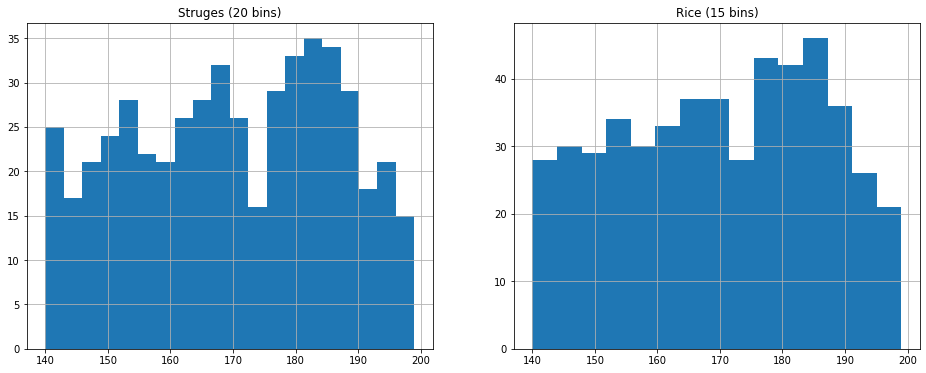

In [86]:
import numpy as np
bins_struges=int(3.3*np.log(len(data['Height'])))
bins_rice=int(2*len(data['Height'])**(1/3))

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Struges ({} bins)'.format(bins_struges))
plt.hist(data['Height'], bins=bins_struges)
plt.grid()
plt.subplot(1,2,2)
plt.title('Rice ({} bins)'.format(bins_rice))
plt.grid()
plt.hist(data['Height'], bins=bins_rice)
plt.show()

È possibile anche specificare i "bordi" dei bin esplicitamente.

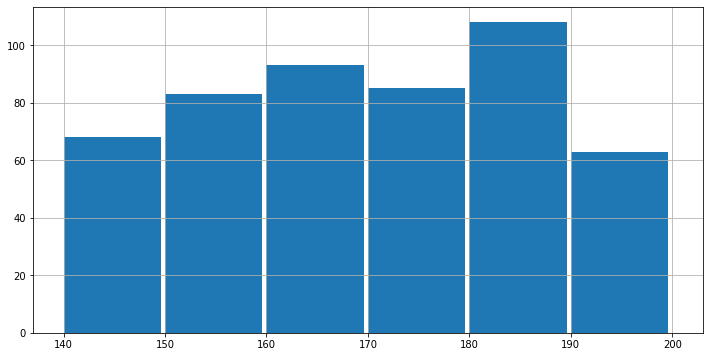

In [103]:
plt.figure(figsize=(12,6))
_,edges,_=plt.hist(data['Height'], bins=[140,150,160,170,180,190,200], width=9.6) #costruiamo un istogramma con i bin definiti
plt.xticks(edges)
plt.grid()
plt.show()
#print(plt.hist(data['Height'], bins=[140,150,160,170,180,190,200], width=9.6))

L'istogramma mostrato sopra riporta le frequenze assolute per ogni bin e ci permette di rispondere a domande del tipo: "quanti soggetti hanno un'altezza compresa tra 1,70 m e 1,80 m?"

#### 5.4.1 Istogrammi di densità

L'istogramma precedente non ci permette di ragionare in termini probabilistici, ovvero non ci permette di dire qual è la probabilità
che un soggetto abbia un'altezza compresa tra 1,70 m e 1,80 m. Se avessimo la PDF della popolazione dalla quale è stato estratto il
campione, potremmo rispondere a questa domanda calcolando l'integrale
$$ \int_{170}^{180} pdf(x)\:dx $$

Possiamo costruire un istogramma di densità, che approssimi in maniera discreta la PDF che cerchiamo. In pratica, vogliamo che l'area
sottesa dal bin di "bordi" [170,180] contenga un valore che approssimi l'integrale della PDF
$$ \int_{170}^{180} pdf(x)\:dx \approx b_j \cdot h_j$$

dove $j$ indica il bin di bordi $[170,180[$, $h_j$ rappresenta la sua larghezza $(180-170)$ e $b_j$ rappresenta la sua altezza (il valore del bin).<br>
Sotto queste condizioni, vale dunque la seguente proprietà:
$$\sum_{i=0}^{n} b_i \cdot h_i  = \int pdf(x)\:dx = 1 $$
dove $n$ è il numero totale di bin.<br>
Per ottenere un istogramma di questo tipo, dobbiamo passare il parametro <code>density=True</code> alla funzione <code>hist</code>.

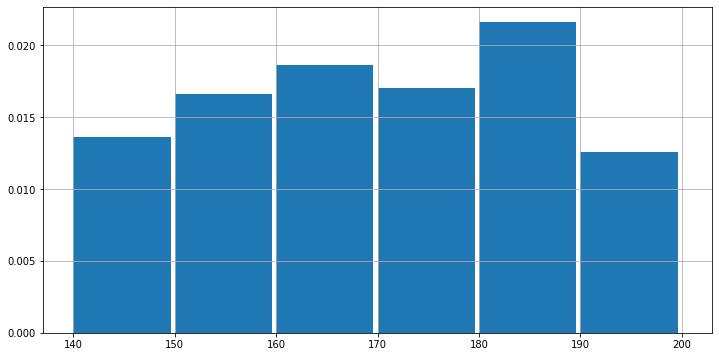

In [99]:
plt.figure(figsize=(12,6))
valori,bordi,_=plt.hist(data['Height'], bins=[140,150,160,170,180,190,200], width=9.6, density=True)
plt.xticks(bordi)
plt.grid()
plt.show()

Verifichiamo che $$\sum_{i=0}^{n} b_i \cdot h_i  =  1 $$

In [106]:
print(valori,bordi)
larghezze = bordi[1:]-bordi[:-1]
print(larghezze) #tutti i bin hanno la stessa larghezza
print((larghezze*valori).sum()) #colcoliamo la somma dei prodotti

[0.0136 0.0166 0.0186 0.017  0.0216 0.0126] [140 150 160 170 180 190 200]
[10 10 10 10 10 10]
1.0


Gli istogrammi possono essere visualizzati anche direttamente da <code>DataFrame</code>

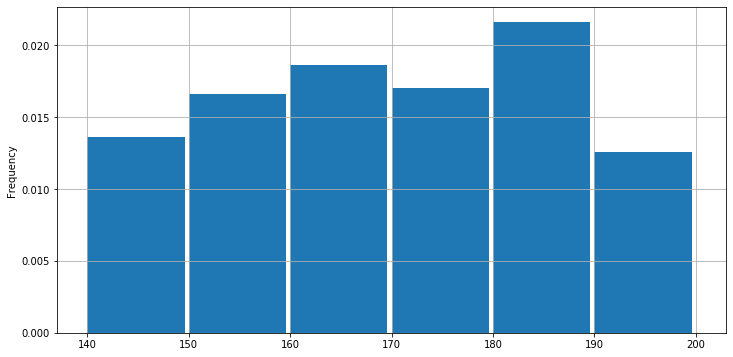

In [107]:
data['Height'].plot.hist(figsize=(12,6), width=9.6, density='True', bins=[140,150,160,170,180,190,200])
plt.grid()
plt.show()

La funzione prende gli stessi parametri in input di <code>hist</code> di matplotlib.

#### 5.4.2 Stima della densità

Esistono delle tecniche che permettono di stimare in maniera non parametrica (non vengono ciò fatte assunzioni sulla natura della
distribuzione dei dati) la densità di probabilità seguita dai dati. Queste tecniche permettono di ottenere una versione più "continua" di un istogramma. Possiamo stimare e plottare le densità mediante Pandas come segue:

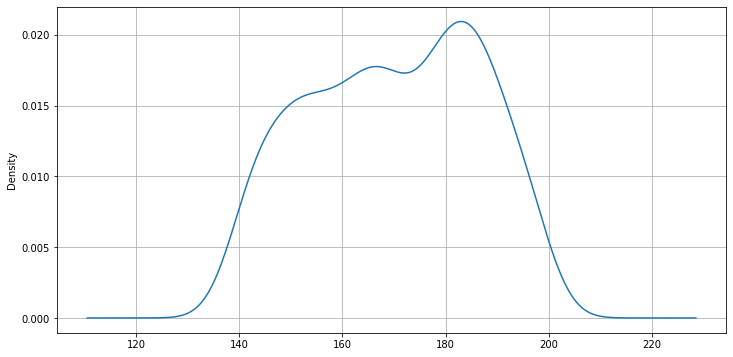

In [108]:
data['Height'].plot.density(figsize=(12,6))
plt.grid()
plt.show()

Confrontiamo la stima della densità con l'istogramma.

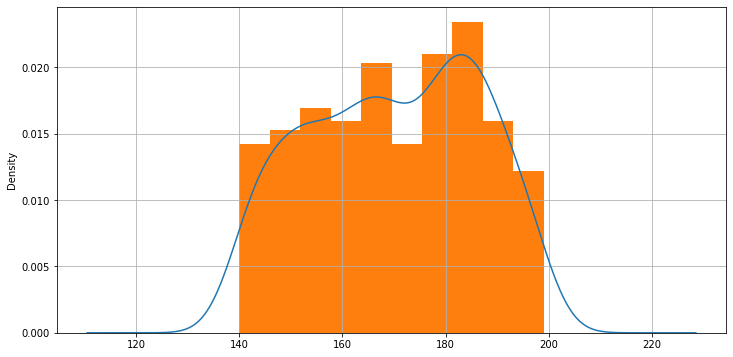

In [109]:
a=data['Height'].plot.density(figsize=(12,6))
plt.hist(data['Height'], density=True)
plt.grid()
plt.show()

#### 5.4.2 Confrontare campioni mediante istogrammi

Gli istogrammi possono essere utili per comparare campioni. Confrontiamo ad esempio gli istogrammi del campione delle altezzie degli uomini
e del campione delle altezze delle donne.

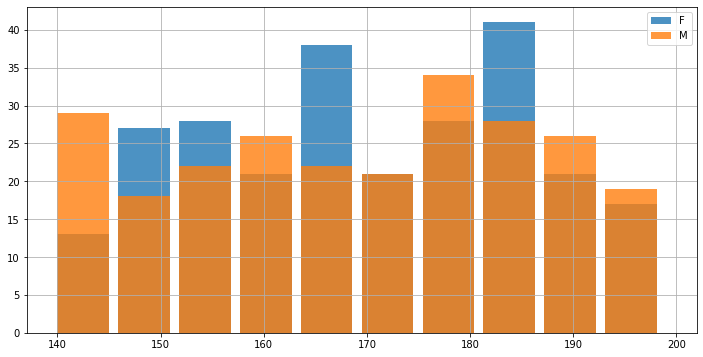

In [110]:
plt.figure(figsize=(12,6))
plt.hist(data[data['Gender']=='Female']['Height'], width=5, alpha=0.8)
plt.hist(data[data['Gender']=='Male']['Height'], width=5, alpha=0.8)
plt.legend(['F','M'])
plt.grid()
plt.show()

È possibile effettuare plot combinati direttamente da Pandas utilizzando <code>groupby</code>

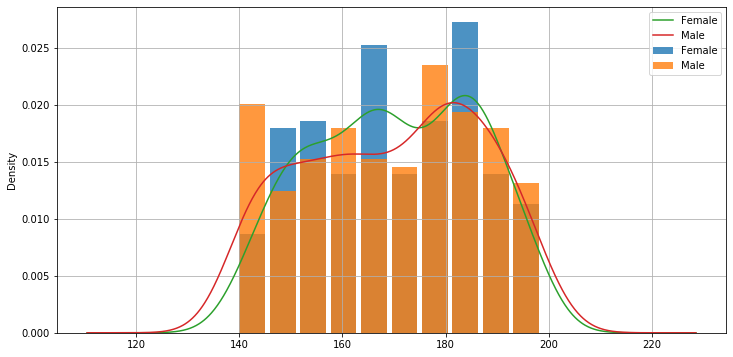

In [31]:
data.groupby('Gender')['Height'].plot.hist(width=5, alpha=0.8, density=True, figsize=(12,6))
data.groupby('Gender')['Height'].plot.density()
plt.legend()
plt.grid()
plt.show()

## 5.5 Visualizzazioni

Abbiamo visto che i grafici a barre possono essere utilizzati per osservare le frequenze assolute e relative dei dati. Vediamo adesso alcune altre visualizzazioni che fanno uso di grafici a barre e grafici a torta per confrontare diverse quantità.<br>
Analizziamo il dataset Titanic.

In [32]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 5.5.1 Barplot

Oltre a mostrare le frequenze dei dati, i barplot possono essere utili per confrontare diverse quantità numeriche. Supponiamo di voler
confrontare il numero di donne e uomini a bordo del Titanic. Possiamo calcolare questi numeri mediante un <code>groupby</code>

In [33]:
titanic.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

Possiamo confrontare queste due quantità visivamente mediante un barplot.

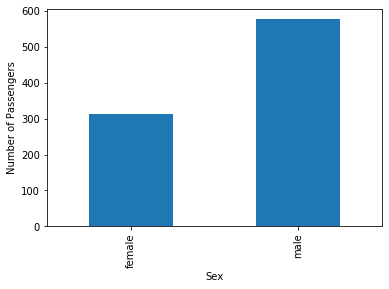

In [34]:
titanic.groupby('Sex')['Sex'].count().plot.bar()
plt.ylabel('Number of Passengers')
plt.show()

Confrontiamo adesso le età medie dei passeggeri imbarcati nelle varie classi. Costruiamo prima una tabella riassuntiva mediante
<code>groupby</code>

In [35]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Possiamo confrontare le quantità ottenute graficamente tramite barplot.

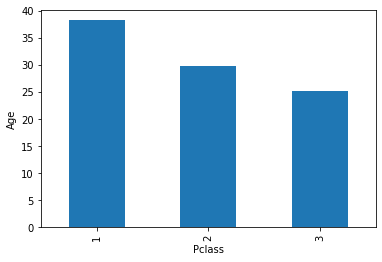

In [36]:
titanic.groupby('Pclass')['Age'].mean().plot.bar()
plt.ylabel('Age')
plt.show()

Calcoliamo il numero di sopravvissuti per classe di imbarco.

In [37]:
pd.crosstab(titanic['Pclass'], titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Per ottenere delle percentuali, normalizziamo per righe.

In [38]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Ogni riga della tabella riporta la percentuale di sopravvissuti (1) e la percentuale di non sopravvissuti (0). Visualizziamo un grafico a barre della tabella.

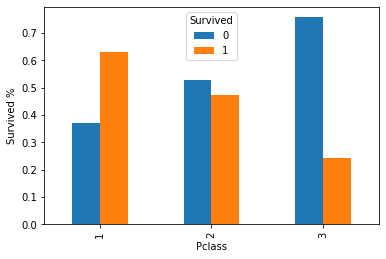

In [39]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index').plot.bar()
plt.ylabel('Survived %')
plt.show()

Un grafico spesso utile a confrontare grandezze complementari (come nel caso delle percentuali viste sopra) è lo "stacked bar plot". Per
ottenere questo grafico bisogna passare <code>stacked=True</code> al metodo <code>bar</code>

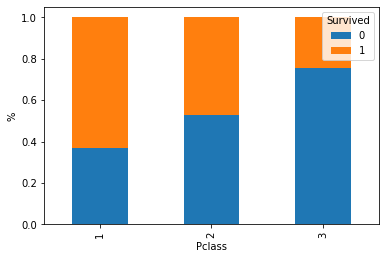

In [40]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index').plot.bar(stacked=True)
plt.ylabel('%')
plt.show()

Possiamo mettere in relazione anche più variabili.

In [41]:
pd.crosstab([titanic['Pclass'], titanic['Sex']], titanic['Survived'], normalize='index')

Survived              0         1
Pclass Sex                       
1      female  0.031915  0.968085
       male    0.631148  0.368852
2      female  0.078947  0.921053
       male    0.842593  0.157407
3      female  0.500000  0.500000
       male    0.864553  0.135447

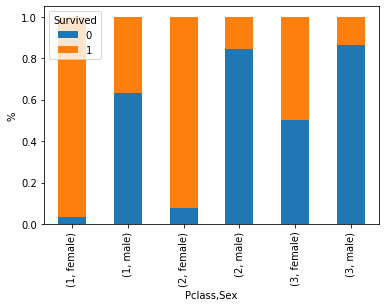

In [42]:
pd.crosstab([titanic['Pclass'], titanic['Sex']], titanic['Survived'], normalize='index').plot.bar(stacked=True)
plt.ylabel('%')
plt.show()

Così come per i barplot, è possibile confrontare gli istogrammi di diversi campioni di dati.<br>
Confrontiamo le distribuzioni delle età distinte per sesso.

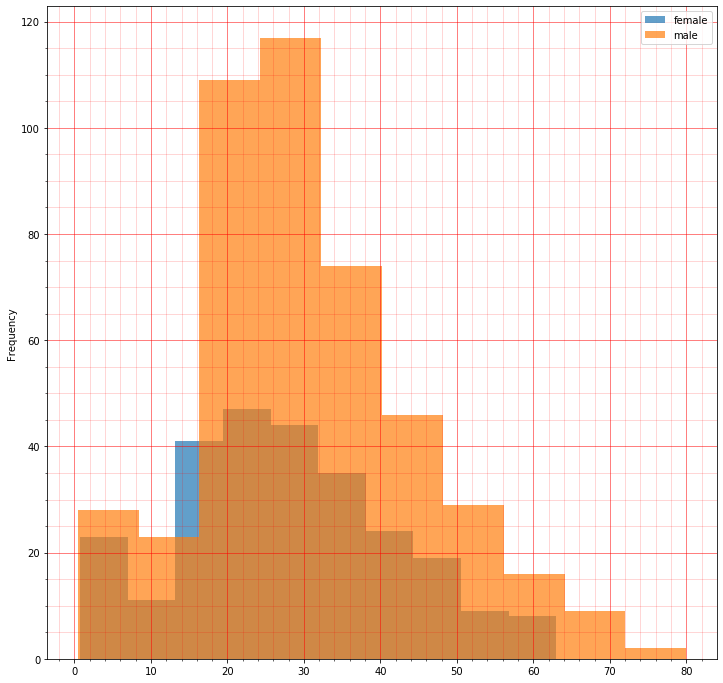

In [43]:
plt.figure(figsize=(12,12))
titanic.groupby('Sex')['Age'].plot.hist(alpha=0.7) #alpha=0.7 serve a mostrare gli istogrammi come semi-trasparenti
plt.grid(which='major', linestyle='-', linewidth='0.5', color='r') #which='major' ci permette di definire le linee principali della griglia
plt.grid(which='minor',  linestyle='-', color='r', alpha=0.2) #which='minor' quelle intermedie
plt.minorticks_on() #mostra le linee intermedie della griglia
plt.legend()
plt.show()

Allo stesso modo possiamo confrontare le densità.

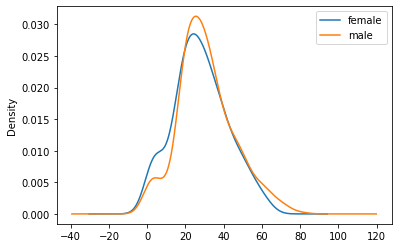

In [44]:
titanic.groupby('Sex')['Age'].plot.density()
plt.legend()
plt.show()

#### 5.5.2 Grafici a Torta

I grafici a torta vengono utilizzati per confrontare diverse quantità senza imporre un ordinamento a priori. Supponiamo ad esempio di
voler confrontare il numero di sopravvissuti in rispetto ai due sessi. Iniziamo ottenendo una tabella che riassume i numeri da confrontare.

In [45]:
titanic.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

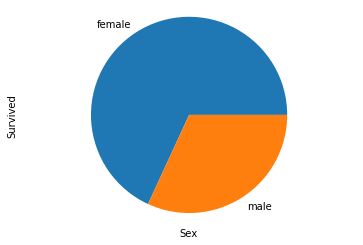

In [46]:
titanic.groupby('Sex')['Survived'].sum().plot.pie()
plt.xlabel('Sex')
plt.axis('equal') #gli assi hanno stessa dimensione: il risultato sarà una circonferenza
plt.show()

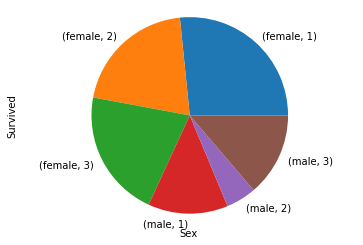

In [47]:
titanic.groupby(['Sex','Pclass'])['Survived'].sum().plot.pie() #mostriamo i sopravvissuti per classe
plt.xlabel('Sex')
plt.axis('equal')
plt.show()

## - Distribuzioni dei dati - FINE 